# First Iteration

Here we will focus on extrinsic values of a listing


In [2]:
'''Importing Data Manipulation Modules'''
import numpy as np                 # Linear Algebra
import pandas as pd                # Data Processing, CSV file I/O (e.g. pd.read_csv)

'''Seaborn and Matplotlib Visualization'''
import matplotlib                  # 2D Plotting Library
import matplotlib.pyplot as plt
import seaborn as sns              # Python Data Visualization Library based on matplotlib
           # Python Geospatial Data Library
plt.style.use('fivethirtyeight')
%matplotlib inline
import os

'''Plotly Visualizations'''
import plotly as plotly                # Interactive Graphing Library for Python
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)

'''Spatial Visualizations'''
import folium
import folium.plugins
from folium.plugins import MarkerCluster
from folium import plugins

'''NLP - WordCloud'''
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

'''Machine Learning'''
import sklearn
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
import timeit

from sklearn.preprocessing import scale, StandardScaler, RobustScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LinearRegression, ElasticNet,  HuberRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.utils import resample

from xgboost import XGBRegressor

#Model interpretation modules
import eli5
import lime
import lime.lime_tabular
import shap
shap.initjs()

import warnings
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
# saving the dataset for later use

pd.set_option('display.max_columns', 500)
df_airbnb = pd.read_csv('../Data/dataset_cleaned_first.csv')

In [4]:
df_airbnb.head(2)

ID                                               Name   Latitude  \
0    633276                Jacuzzi Suite, minutes to Times Sq.  40.746086   
1  17285980  Private 1br in quiet Long Island City neighbor...  40.734965   

   Longitude  Price  Security Deposit  Cleaning Fee  Host Response Rate  \
0 -73.946906  108.0             400.0          49.0               100.0   
1 -73.935211   80.0             300.0          15.0                80.0   

   Host Total Listings Count Neighbourhood Cleansed  \
0                        2.0       Long Island City   
1                        1.0       Long Island City   

  Neighbourhood Group Cleansed Property Type  Accommodates  Bathrooms  \
0                       Queens         House           2.0        1.0   
1                       Queens     Apartment           3.0        1.0   

   Bedrooms  Beds                                          Amenities  \
0       1.0   1.0  TV,Internet,Wireless Internet,Air conditioning...   
1       1.0   1.0  Wireless Internet,Air conditioning,Kitchen,Hea...   

   Number of Reviews  Reviews per Month  Review Scores Rating  \
0               89.0               1.58                  0.94   
1                1.0               0.38                  0.00   

   Review Scores Accuracy  Review Scores Cleanliness  Review Scores Checkin  \
0                     1.0                        0.9                    1.0   
1                     0.0                        0.0                    0.0   

   Review Scores Communication  Review Scores Location  Review Scores Value  \
0                          1.0                     0.9                  0.9   
1                          0.0                     0.0                  0.0   

   rt_Entire home/apt  rt_Private room  rt_Shared room  bg_Bronx  bg_Brooklyn  \
0                   0                1               0         0            0   
1                   1                0               0         0            0   

   bg_Manhattan  bg_Queens  bg_Staten Island  crime  income  \
0             0          1                 0   38.6   46829   
1             0          1                 0   38.6   46829   

   h_a few days or more  h_not specified  h_within a day  \
0                     0                0               0   
1                     0                0               1   

   h_within a few hours  h_within an hour  
0                     1                 0  
1                     0                 0

In [5]:

df_airbnb.fillna({'Name':'','Security Deposit':0, 'Cleaning Fee':0, 'Host Response Rate':0, 'Amenities':'',
               'Reviews per Month':0, 'Review Scores Rating':0, 'Review Scores Accuracy':0,
               'Review Scores Cleanliness':0, 'Review Scores Checkin':0, 'Review Scores Communication':0,
               'Review Scores Location':0, 'Review Scores Value':0, 'Host Total Listings Count': 1, 'Bathrooms': 1,
               'Bedrooms':0, 'Beds': 1, 'Host Response Time': 'not specified'}, inplace=True)

In [6]:
pd.options.display.max_rows = 999
df_airbnb.isnull().sum()

ID                              0
Name                            0
Latitude                        0
Longitude                       0
Price                           0
Security Deposit                0
Cleaning Fee                    0
Host Response Rate              0
Host Total Listings Count       0
Neighbourhood Cleansed          0
Neighbourhood Group Cleansed    0
Property Type                   0
Accommodates                    0
Bathrooms                       0
Bedrooms                        0
Beds                            0
Amenities                       0
Number of Reviews               0
Reviews per Month               0
Review Scores Rating            0
Review Scores Accuracy          0
Review Scores Cleanliness       0
Review Scores Checkin           0
Review Scores Communication     0
Review Scores Location          0
Review Scores Value             0
rt_Entire home/apt              0
rt_Private room                 0
rt_Shared room                  0
bg_Bronx      

In [7]:
df_pearson = df_airbnb[['Price', 'Security Deposit', 'Cleaning Fee',
                       'Host Response Rate','Neighbourhood Group Cleansed', 'Property Type',
                       'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Number of Reviews', 'Reviews per Month', 'crime', 
                       'income']]

df_pearson.head(3)

Price  Security Deposit  Cleaning Fee  Host Response Rate  \
0  108.0             400.0          49.0               100.0   
1   80.0             300.0          15.0                80.0   
2  115.0               0.0           0.0               100.0   

  Neighbourhood Group Cleansed Property Type  Accommodates  Bathrooms  \
0                       Queens         House           2.0        1.0   
1                       Queens     Apartment           3.0        1.0   
2                       Queens     Apartment           3.0        1.0   

   Bedrooms  Beds  Number of Reviews  Reviews per Month  crime  income  
0       1.0   1.0               89.0               1.58   38.6   46829  
1       1.0   1.0                1.0               0.38   38.6   46829  
2       1.0   2.0                3.0               3.00   38.6   46829

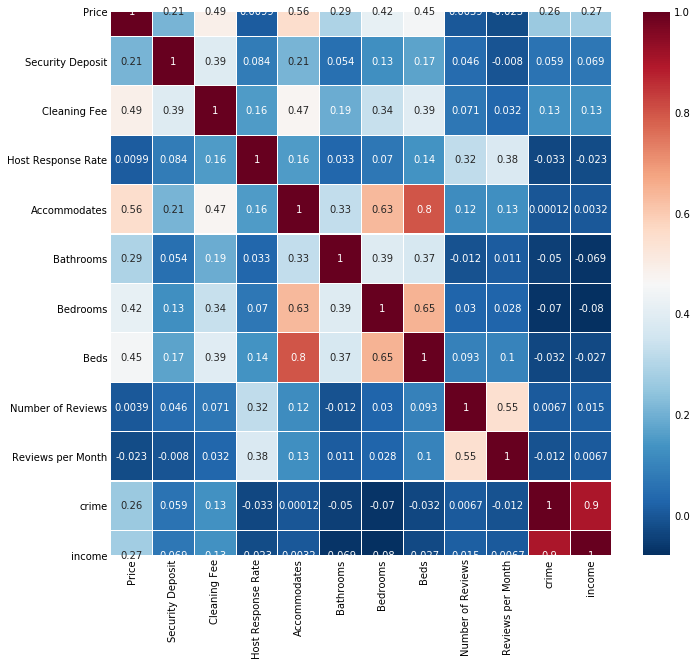

In [8]:
pearsoncorr = df_pearson.corr(method='pearson')
plt.figure(figsize=(10, 10))
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.1)

In [9]:
df_airbnb['Score'] = df_airbnb.apply(lambda x: (x['Review Scores Value'] + 
                                                        x['Review Scores Location'] +
                                                       x['Review Scores Communication'] +
                                                       x['Review Scores Checkin'] +
                                                       x['Review Scores Cleanliness'] +
                                                       x['Review Scores Accuracy'] + 
                                                       x['Review Scores Rating']) / 7, axis=1)

df_airbnb.drop(['Review Scores Value','Review Scores Location', 'Review Scores Communication', 'Review Scores Checkin',
                 'Review Scores Cleanliness', 'Review Scores Accuracy', 'Review Scores Rating'], axis=1, inplace=True)

In [10]:
df_airbnb.head(2)

ID                                               Name   Latitude  \
0    633276                Jacuzzi Suite, minutes to Times Sq.  40.746086   
1  17285980  Private 1br in quiet Long Island City neighbor...  40.734965   

   Longitude  Price  Security Deposit  Cleaning Fee  Host Response Rate  \
0 -73.946906  108.0             400.0          49.0               100.0   
1 -73.935211   80.0             300.0          15.0                80.0   

   Host Total Listings Count Neighbourhood Cleansed  \
0                        2.0       Long Island City   
1                        1.0       Long Island City   

  Neighbourhood Group Cleansed Property Type  Accommodates  Bathrooms  \
0                       Queens         House           2.0        1.0   
1                       Queens     Apartment           3.0        1.0   

   Bedrooms  Beds                                          Amenities  \
0       1.0   1.0  TV,Internet,Wireless Internet,Air conditioning...   
1       1.0   1.0  Wireless Internet,Air conditioning,Kitchen,Hea...   

   Number of Reviews  Reviews per Month  rt_Entire home/apt  rt_Private room  \
0               89.0               1.58                   0                1   
1                1.0               0.38                   1                0   

   rt_Shared room  bg_Bronx  bg_Brooklyn  bg_Manhattan  bg_Queens  \
0               0         0            0             0          1   
1               0         0            0             0          1   

   bg_Staten Island  crime  income  h_a few days or more  h_not specified  \
0                 0   38.6   46829                     0                0   
1                 0   38.6   46829                     0                0   

   h_within a day  h_within a few hours  h_within an hour     Score  
0               0                     1                 0  0.948571  
1               1                     0                 0  0.000000

### Step 1: 

Augument the dataset with points of interes

In [11]:
df_poi = pd.read_csv('../Data/NYC_T_AT.csv')
df_poi

Name   Latitude  Longitude
0                         Statue of Liberty  40.689249 -74.044500
1                     Empire state building  40.748441 -73.985664
2                           Brooklin Bridge  40.706086 -73.996864
3                              Central park  40.782865 -73.965355
4                     One World Observatory  40.713344 -74.013368
5                Metropolitan Museum of Art  40.779437 -73.965433
6                         Chrysler Building  40.751621 -73.975502
7                                 High Line  40.747993 -74.004765
8                          Theater District  40.759431 -73.987753
9              The 9/11 Memorial and Museum  40.711484 -74.012725
10                       Rockefeller Center  40.758740 -73.978674
11                   Grand Central Terminal  40.752726 -73.977229
12                            Prospect Park  40.660204 -73.968956
13                          Brooklyn Museum  40.671206 -73.963631
14                    Whitney Museum of Art  40.739592 -74.011052
15              New-York Historical Society  40.776340 -73.961440
16  Bronx Zoo Wildlife Conservation Society  40.850595 -73.876998
17             Solomon R. Guggenheim Museum  40.782980 -73.958971
18                             Times Square  40.758895 -73.985131
19                New York Botanical Garden  40.862390 -73.877244
20                            Brooklin Flee  40.719879 -73.961537
21           Flushing Meadows - Corona Park  40.739714 -73.840785
22                         Brookfield Place  40.713192 -74.015913
23                           Chelsea Market  40.742569 -74.006068
24                           Apollo Theater  40.810018 -73.950056
25                              Smorgasburg  40.721485 -73.962117
26               Brooklin Heights Promenade  40.696198 -73.999692
27                     Macy's Herald Square  40.750782 -73.988959
28                  Brooklyn Botanic Garden  40.669411 -73.962374
29                      Coney Island Museum  40.575329 -73.979783
30                           Yankee Stadium  40.829647 -73.928363
31       American Museum of Natural History  40.781324 -73.973988
32                             Union Square  40.735863 -73.991084
33                        Flatiron Building  40.741061 -73.989699
34                         Roosevelt Island  40.760503 -73.950993
35                            The Cloisters  40.864863 -73.931727
36         Interpid Sea, Air & Space Museum  40.764531 -74.001796
37                           Lincoln Center  40.772464 -73.983489
38                     South Street Seaport  40.705937 -74.002676
39                     Museum of Modern Art  40.761433 -73.977622
40                    Radio City Music Hall  40.759976 -73.979977
41                            Queens Museum  40.745940 -73.846733
42                  St. Patrick's Cathedral  40.758465 -73.975993
43                  New York Public Library  40.753182 -73.982253
44                                 MoMA PS1  40.745490 -73.947357
45                                Chinatown  40.715751 -73.997031
46              Washington Square Park arch  40.730823 -73.997332
47                          Madame Tussauds  40.756381 -73.988362
48                    Madison Square Garden  40.750504 -73.993439
49                         Governors Island  40.691988 -74.015995
50                  Socrates Sculpture Park  40.768479 -73.936636
51                    AKC Museum of the Dog  40.750822 -73.979743
52                      Queens Night Market  40.747262 -73.851700
53              Snug Harbor Cultural Center  40.642631 -74.101917
54                              Bryant Park  40.771209 -73.967399
55                              Wall Street  40.706001 -74.008801
56                            Charging Bull  40.705554 -74.013444

In [12]:
'''Spatial Visualizations'''
import folium
import folium.plugins
from folium.plugins import MarkerCluster
from folium import plugins

# Plotting tourist attractions on a map
print('The 50+ most known tourist attractions')
nyc_lon = -73.80
nyc_lat = 40.80
map_att =folium.Map([nyc_lat,nyc_lon],tiles='cartodbdark_matter',zoom_start=10,)

for lat,lon,label in zip(df_poi.Latitude,df_poi.Longitude,df_poi.Name):
    folium.Marker(location=[lat,lon],icon=folium.Icon(icon='info-sign'),popup=label).add_to(map_att)

map_att.save('../Visualization/Tourist_Attractions.html')

The 50+ most known tourist attractions


In [13]:
df_demographics = pd.read_csv('../Data/CR_WG_POP.csv')
df_demographics

Unnamed: 0        BORO_NM  CR_RT   AVG_W  POPULATION
0           0          Bronx  69.05   35564     1432132
1           1       Brooklyn  51.76   48758     2582830
2           2      Manhattan  68.63  175960     1628701
3           3         Queens  38.60   46829     2278906
4           4  Staten Island  42.74   54908      476179

In [14]:
# Preparing the data for some map visualization
df_crime = df_demographics[['BORO_NM','CR_RT']]
df_income = df_demographics[['BORO_NM', 'AVG_W']]

In [15]:
# Initialize the map:
m = folium.Map(location=[40.80, -73.80], zoom_start=10)
 
# Add the color for the chloropleth:
m.choropleth(
 geo_data='../Data/borough_nyc.json',
 name='choropleth',
 data=df_crime,
 columns=['BORO_NM','CR_RT'],
 key_on='feature.properties.BoroName',
 fill_color='Reds',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Crime Rate (%)'
)
folium.LayerControl().add_to(m)
 
# Save to html
m.save('../Visualization/Crime.html')

In [16]:

# Initialize the map:
m = folium.Map(location=[40.80, -73.80], zoom_start=10)
 
# Add the color for the chloropleth:
m.choropleth(
 geo_data='../Data/borough_nyc.json',
 name='choropleth',
 data=df_income,
 columns=['BORO_NM','AVG_W'],
 key_on='feature.properties.BoroName',
 fill_color='YlGn',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Average wage per citizen (Yearly)'
)
folium.LayerControl().add_to(m)
 
# Save to html
m.save('../Visualization/Income.html')


In [17]:
import geopy.distance

# this function returns 1 if the listing is around a point of interest and 0 otherwise.
def calculate_distance(listing, point_of_interest):
    return 1 if geopy.distance.distance(listing, point_of_interest).km <= 0.75 else 0

In [18]:
# Calculating how many points of interest there are in the near vicinity
def no_poi_near_listing(listing, df_poi):
    x = df_poi.apply(lambda x: calculate_distance(listing, (x['Latitude'], x['Longitude'])) != 0, axis=1)
    return len(x[x == 1].index)

In [50]:
# Computing the points of interest nearby the listings
df_airbnb['poi'] = df_airbnb.apply(lambda x: no_poi_near_listing((x['Latitude'], x['Longitude']), df_poi),axis=1)

KeyboardInterrupt: 

In [19]:
df_airbnb.to_csv('../Data/first_iter_poi.csv')

#### Start here with the dataset first_iter_poi

In [20]:
df_airbnb.head()

ID                                               Name   Latitude  \
0    633276                Jacuzzi Suite, minutes to Times Sq.  40.746086   
1  17285980  Private 1br in quiet Long Island City neighbor...  40.734965   
2  17938814    Beautiful spacious one bedroom, upper east side  40.746234   
3  12762161                 Garden PentHouse 8Min to Manhattan  40.753186   
4   9759331                 2BD located 1 stop from Manhattan!  40.747142   

   Longitude  Price  Security Deposit  Cleaning Fee  Host Response Rate  \
0 -73.946906  108.0             400.0          49.0               100.0   
1 -73.935211   80.0             300.0          15.0                80.0   
2 -73.956953  115.0               0.0           0.0               100.0   
3 -73.933830  395.0             500.0         150.0                90.0   
4 -73.950003   55.0             100.0          40.0                 0.0   

   Host Total Listings Count Neighbourhood Cleansed  \
0                        2.0       Long Island City   
1                        1.0       Long Island City   
2                        1.0       Long Island City   
3                        1.0       Long Island City   
4                        1.0       Long Island City   

  Neighbourhood Group Cleansed Property Type  Accommodates  Bathrooms  \
0                       Queens         House           2.0        1.0   
1                       Queens     Apartment           3.0        1.0   
2                       Queens     Apartment           3.0        1.0   
3                       Queens     Apartment          12.0        2.0   
4                       Queens     Apartment           2.0        1.0   

   Bedrooms  Beds                                          Amenities  \
0       1.0   1.0  TV,Internet,Wireless Internet,Air conditioning...   
1       1.0   1.0  Wireless Internet,Air conditioning,Kitchen,Hea...   
2       1.0   2.0  TV,Cable TV,Wireless Internet,Kitchen,Smoking ...   
3       1.0   5.0  Internet,Wireless Internet,Air conditioning,Ki...   
4       2.0   2.0  TV,Internet,Wireless Internet,Kitchen,Buzzer/w...   

   Number of Reviews  Reviews per Month  rt_Entire home/apt  rt_Private room  \
0               89.0               1.58                   0                1   
1                1.0               0.38                   1                0   
2                3.0               3.00                   1                0   
3               24.0               2.38                   1                0   
4                1.0               0.06                   0                1   

   rt_Shared room  bg_Bronx  bg_Brooklyn  bg_Manhattan  bg_Queens  \
0               0         0            0             0          1   
1               0         0            0             0          1   
2               0         0            0             0          1   
3               0         0            0             0          1   
4               0         0            0             0          1   

   bg_Staten Island  crime  income  h_a few days or more  h_not specified  \
0                 0   38.6   46829                     0                0   
1                 0   38.6   46829                     0                0   
2                 0   38.6   46829                     0                0   
3                 0   38.6   46829                     0                0   
4                 0   38.6   46829                     0                1   

   h_within a day  h_within a few hours  h_within an hour     Score  
0               0                     1                 0  0.948571  
1               1                     0                 0  0.000000  
2               0                     0                 1  0.942857  
3               1                     0                 0  0.945714  
4               0                     0                 0  1.000000

In [21]:
# one hot encoding the neighbourhood

dfDummies = pd.get_dummies(df_airbnb['Neighbourhood Cleansed'], prefix = 'h')
df_airbnb = pd.concat([df_airbnb, dfDummies], axis=1)

# Dropping the neighbourhood

df_airbnb.drop(['Neighbourhood Cleansed'], axis=1, inplace=True)

In [22]:
df_airbnb.head(2)

ID                                               Name   Latitude  \
0    633276                Jacuzzi Suite, minutes to Times Sq.  40.746086   
1  17285980  Private 1br in quiet Long Island City neighbor...  40.734965   

   Longitude  Price  Security Deposit  Cleaning Fee  Host Response Rate  \
0 -73.946906  108.0             400.0          49.0               100.0   
1 -73.935211   80.0             300.0          15.0                80.0   

   Host Total Listings Count Neighbourhood Group Cleansed Property Type  \
0                        2.0                       Queens         House   
1                        1.0                       Queens     Apartment   

   Accommodates  Bathrooms  Bedrooms  Beds  \
0           2.0        1.0       1.0   1.0   
1           3.0        1.0       1.0   1.0   

                                           Amenities  Number of Reviews  \
0  TV,Internet,Wireless Internet,Air conditioning...               89.0   
1  Wireless Internet,Air conditioning,Kitchen,Hea...                1.0   

   Reviews per Month  rt_Entire home/apt  rt_Private room  rt_Shared room  \
0               1.58                   0                1               0   
1               0.38                   1                0               0   

   bg_Bronx  bg_Brooklyn  bg_Manhattan  bg_Queens  bg_Staten Island  crime  \
0         0            0             0          1                 0   38.6   
1         0            0             0          1                 0   38.6   

   income  h_a few days or more  h_not specified  h_within a day  \
0   46829                     0                0               0   
1   46829                     0                0               1   

   h_within a few hours  h_within an hour     Score  h_Allerton  \
0                     1                 0  0.948571           0   
1                     0                 0  0.000000           0   

   h_Arden Heights  h_Arrochar  h_Arverne  h_Astoria  h_Bath Beach  \
0                0           0          0          0             0   
1                0           0          0          0             0   

   h_Battery Park City  h_Bay Ridge  h_Bay Terrace  \
0                    0            0              0   
1                    0            0              0   

   h_Bay Terrace, Staten Island  h_Baychester  h_Bayside  h_Bayswater  \
0                             0             0          0            0   
1                             0             0          0            0   

   h_Bedford-Stuyvesant  h_Belle Harbor  h_Bellerose  h_Belmont  \
0                     0               0            0          0   
1                     0               0            0          0   

   h_Bensonhurst  h_Bergen Beach  h_Boerum Hill  h_Borough Park  h_Briarwood  \
0              0               0              0               0            0   
1              0               0              0               0            0   

   h_Brighton Beach  h_Bronxdale  h_Brooklyn Heights  h_Brownsville  \
0                 0            0                   0              0   
1                 0            0                   0              0   

   h_Bushwick  h_Cambria Heights  h_Canarsie  h_Carroll Gardens  \
0           0                  0           0                  0   
1           0                  0           0                  0   

   h_Castle Hill  h_Castleton Corners  h_Chelsea  h_Chinatown  h_City Island  \
0              0                    0          0            0              0   
1              0                    0          0            0              0   

   h_Civic Center  h_Claremont Village  h_Clason Point  h_Clifton  \
0               0                    0               0          0   
1               0                    0               0          0   

   h_Clinton Hill  h_Co-op City  h_Cobble Hill  h_College Point  \
0               0             0              0                0   
1               0             0              0    

### Step 2: Preparing for Machine learning

In [23]:
df_airbnb = df_airbnb.drop(['ID','Name', 'Property Type', 'Amenities'], axis=1)
df_airbnb.head(3)

Latitude  Longitude  Price  Security Deposit  Cleaning Fee  \
0  40.746086 -73.946906  108.0             400.0          49.0   
1  40.734965 -73.935211   80.0             300.0          15.0   
2  40.746234 -73.956953  115.0               0.0           0.0   

   Host Response Rate  Host Total Listings Count Neighbourhood Group Cleansed  \
0               100.0                        2.0                       Queens   
1                80.0                        1.0                       Queens   
2               100.0                        1.0                       Queens   

   Accommodates  Bathrooms  Bedrooms  Beds  Number of Reviews  \
0           2.0        1.0       1.0   1.0               89.0   
1           3.0        1.0       1.0   1.0                1.0   
2           3.0        1.0       1.0   2.0                3.0   

   Reviews per Month  rt_Entire home/apt  rt_Private room  rt_Shared room  \
0               1.58                   0                1               0   
1               0.38                   1                0               0   
2               3.00                   1                0               0   

   bg_Bronx  bg_Brooklyn  bg_Manhattan  bg_Queens  bg_Staten Island  crime  \
0         0            0             0          1                 0   38.6   
1         0            0             0          1                 0   38.6   
2         0            0             0          1                 0   38.6   

   income  h_a few days or more  h_not specified  h_within a day  \
0   46829                     0                0               0   
1   46829                     0                0               1   
2   46829                     0                0               0   

   h_within a few hours  h_within an hour     Score  h_Allerton  \
0                     1                 0  0.948571           0   
1                     0                 0  0.000000           0   
2                     0                 1  0.942857           0   

   h_Arden Heights  h_Arrochar  h_Arverne  h_Astoria  h_Bath Beach  \
0                0           0          0          0             0   
1                0           0          0          0             0   
2                0           0          0          0             0   

   h_Battery Park City  h_Bay Ridge  h_Bay Terrace  \
0                    0            0              0   
1                    0            0              0   
2                    0            0              0   

   h_Bay Terrace, Staten Island  h_Baychester  h_Bayside  h_Bayswater  \
0                             0             0          0            0   
1                             0             0          0            0   
2                             0             0          0            0   

   h_Bedford-Stuyvesant  h_Belle Harbor  h_Bellerose  h_Belmont  \
0                     0               0            0          0   
1                     0               0            0          0   
2                     0               0            0          0   

   h_Bensonhurst  h_Bergen Beach  h_Boerum Hill  h_Borough Park  h_Briarwood  \
0              0               0              0               0            0   
1              0               0              0               0            0   
2              0               0              0               0            0   

   h_Brighton Beach  h_Bronxdale  h_Brooklyn Heights  h_Brownsville  \
0                 0            0                   0              0   
1                 0            0                   0              0   
2                 0            0                   0              0   

   h_Bushwick  h_Cambria Heights  h_Canarsie  h_Carroll Gardens  \
0           0                  0           0                  0   
1           0                  0           0                  0   
2           0                  0           0                  0   

   h_Castle Hill  h_Castleton Corners  h_Chelsea  h_Ch

In [24]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df_airbnb, df_airbnb["Neighbourhood Group Cleansed"]):
    strat_train_set = df_airbnb.loc[train_index]
    strat_test_set = df_airbnb.loc[test_index]

In [25]:
strat_test_set["Neighbourhood Group Cleansed"].value_counts() / len(strat_test_set)

Manhattan        0.470253
Brooklyn         0.413857
Queens           0.093580
Bronx            0.015989
Staten Island    0.006321
Name: Neighbourhood Group Cleansed, dtype: float64

In [26]:
df_airbnb["Neighbourhood Group Cleansed"].value_counts() / len(df_airbnb)

Manhattan        0.470288
Brooklyn         0.413789
Queens           0.093512
Bronx            0.016040
Staten Island    0.006371
Name: Neighbourhood Group Cleansed, dtype: float64

In [27]:
def borough_cat_proportions(data):
    return data["Neighbourhood Group Cleansed"].value_counts() / len(data)

train_set, test_set = train_test_split(df_airbnb, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": borough_cat_proportions(df_airbnb),
    "Stratified": borough_cat_proportions(strat_test_set),
    "Random": borough_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100
compare_props

Overall  Stratified    Random  Rand. %error  Strat. %error
Bronx          0.016040    0.015989  0.015865     -1.089273      -0.316533
Brooklyn       0.413789    0.413857  0.402330     -2.769199       0.016526
Manhattan      0.470288    0.470253  0.475583      1.125847      -0.007437
Queens         0.093512    0.093580  0.096678      3.385736       0.072091
Staten Island  0.006371    0.006321  0.009544     49.794307      -0.785589

In [28]:
CleanDate = strat_test_set

In [29]:
# Creating the x and y sets
y_train = strat_train_set['Price']
X_train = strat_train_set.drop(['Price', 'Neighbourhood Group Cleansed'], axis=1)

y_test = strat_test_set['Price']
X_test = strat_test_set.drop(['Price', 'Neighbourhood Group Cleansed'], axis=1)

In [30]:
strat_train_set

Latitude  Longitude  Price  Security Deposit  Cleaning Fee  \
30488  40.708064 -73.768254   59.0               0.0           5.0   
17187  40.693442 -73.909174   65.0               0.0          15.0   
38359  40.660509 -73.984945  375.0             500.0         175.0   
33837  40.731884 -73.957226  100.0               0.0          40.0   
17392  40.756277 -73.969157   70.0               0.0           0.0   
...          ...        ...    ...               ...           ...   
30988  40.681731 -73.873141   46.0               0.0          25.0   
8788   40.706098 -74.007323  452.0               0.0           0.0   
11465  40.700963 -73.930922  110.0               0.0           0.0   
33730  40.686187 -73.953866  100.0               0.0         100.0   
25016  40.802110 -73.945732  150.0             200.0          95.0   

       Host Response Rate  Host Total Listings Count  \
30488                96.0                        5.0   
17187                97.0                        4.0   
38359               100.0                        1.0   
33837                 0.0                        1.0   
17392               100.0                        1.0   
...                   ...                        ...   
30988               100.0                        4.0   
8788                100.0                        7.0   
11465               100.0                        1.0   
33730               100.0                        1.0   
25016               100.0                        1.0   

      Neighbourhood Group Cleansed  Accommodates  Bathrooms  Bedrooms  Beds  \
30488                       Queens           2.0        1.0       1.0   1.0   
17187                     Brooklyn           2.0        1.0       1.0   1.0   
38359                     Brooklyn           6.0        2.0       4.0   4.0   
33837                     Brooklyn           2.0        1.0       1.0   1.0   
17392                    Manhattan           1.0        1.0       1.0   1.0   
...                            ...           ...        ...       ...   ...   
30988                     Brooklyn           2.0        1.0       0.0   1.0   
8788                     Manhattan           2.0        1.0       1.0   1.0   
11465                     Brooklyn           2.0        1.0       1.0   1.0   
33730                     Brooklyn           2.0        1.0       1.0   1.0   
25016                    Manhattan           3.0        1.0       1.0   2.0   

       Number of Reviews  Reviews per Month  rt_Entire home/apt  \
30488                1.0               1.00                   0   
17187               68.0               1.96                   0   
38359               11.0               0.20                   1   
33837                5.0               0.50                   1   
17392                1.0               0.21                   0   
...                  ...                ...                 ...   
30988               25.0               1.50                   0   
8788                 0.0               0.00                   1   
11465                2.0               0.26                   0   
33730                0.0               0.00                   1   
25016               14.0               0.84                   1   

       rt_Private room  rt_Shared room  bg_Bronx  bg_Brooklyn  bg_Manhattan  \
30488                1               0         0            0             0   
17187                1               0         0            1             0   
38359                0               0         0            1             0   
33837                0               0         0            1             0   
17392                1               0         0            0             1   
...                ...             ...       ...          ...           ...   
30988                1               0         0            1             0   
8788                 0               0         0            0             1   
11465                1       

In [31]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [32]:
print('Dimensions of the training feature matrix: {}'.format(X_train.shape))
print('Dimensions of the training target vector: {}'.format(y_train.shape))
print('Dimensions of the test feature matrix: {}'.format(X_test.shape))
print('Dimensions of the test target vector: {}'.format(y_test.shape))

Dimensions of the training feature matrix: (32269, 245)
Dimensions of the training target vector: (32269,)
Dimensions of the test feature matrix: (8068, 245)
Dimensions of the test target vector: (8068,)


In [27]:
from sklearn.model_selection import KFold
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

n_folds = 5

# squared_loss
def metrics_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state = 91).get_n_splits(df_airbnb)
    print("""Explained Variance Score: {}""".format(cross_val_score(model, X_train, y_train, scoring='explained_variance', cv=kf)))
    print("""Maximum error: {}""".format(cross_val_score(model, X_train, y_train, scoring='max_error', cv=kf)))
    print("""Mean Absolute Error: {}""".format(cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=kf)))
    print("""Mean Squared Error: {}""".format(cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=kf)))
    print("""R2 Score: {}""".format(cross_val_score(model, X_train, y_train, scoring='r2', cv=kf)))
    print("""Median Absolute Error: {}""".format(cross_val_score(model, X_train, y_train, scoring='neg_median_absolute_error', cv=kf)))
    return cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=kf)

def rmse_lv_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state = 91).get_n_splits(airbnb_playground)
    return cross_val_score(model, Xlv_train, y_train, scoring='neg_mean_squared_error', cv=kf)

In [28]:
def rmse_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state = 91).get_n_splits(airbnb_playground)
    return cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=kf)

In [29]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

def metrics(y_test, y_pred):
    # How far observed values differ from the predicted value mean - 1.0 best, lower worse
    print("""Explained Variance Score: {}""".format(explained_variance_score(y_test, y_pred)))
    # Calculates the maximum residual error - 0.0 is best, greater is worse
    print("""Maximum error: {}""".format(max_error(y_test, y_pred)))
    # The mean of the absolute errors - non-negative floating point, lower is better
    print("""Mean Absolute error: {}""".format(mean_absolute_error(y_test, y_pred)))
    # The mean of the squared error - quadratic (involving the second and no higher power) - magnitude of the error
    # gives the average squared difference between the predicted and actual value. - positive value, lower(0.0) is best
    print("""Mean Squared error: {}""".format(mean_squared_error(y_test, y_pred)))
    # Gives a non-negative value that represents the ratio between the true and predicted values. Variation of MSE
    # print("""Mean Squared Logarithmic Error: {}""".format(mean_squared_log_error(y_test, y_pred)))
    # Measures the average if tge squares of all errors (estimated and actual) best value is 0. Lower is better
    print("""Median Absolute Error: {}""".format(median_absolute_error(y_test, y_pred)))
    # R2 score - can be negative. Best is 1.0.
    # How close the data is to be fitted to a regression line/An R2 value of 0.9, for example, means that 90 
    # percent of the variation in the y data is due to variation in the x data
    print("""R2 Score: {}""".format(r2_score(y_test, y_pred)))

### Classic ML models in action

In [34]:
from sklearn.tree import DecisionTreeRegressor

for Model in [LinearRegression, DecisionTreeRegressor, Ridge, Lasso, ElasticNet, RandomForestRegressor, XGBRegressor, HuberRegressor]:
    print('===========================================')
    print('Metrics for model {}'.format(Model.__name__))
    if Model == XGBRegressor: cv_res = metrics_cv(XGBRegressor(objective='reg:squarederror'))
    else: cv_res = metrics_cv(Model())
    print('===========================================')
    print('{}: {:.5f} +/- {:5f}'.format(Model.__name__, cv_res.mean(), cv_res.std()))
    print('===========================================')
    print('===========================================')

Metrics for model LinearRegression
Explained Variance Score: [-2.53894655e+05 -2.55373803e+03 -1.56551288e+04  6.15600094e-01
 -8.80009601e+02]
Maximum error: [-4.35327459e+06 -3.59785471e+05 -5.99963998e+05 -8.51358689e+02
 -2.07941022e+05]
Mean Absolute Error: [-717.66651735 -146.18403028 -434.18192923  -41.90031934 -100.4206438 ]
Mean Squared Error: [-2.93632368e+09 -2.74416609e+07 -1.79068328e+08 -4.48425683e+03
 -1.06335144e+07]
R2 Score: [-2.53933976e+05 -2.55474543e+03 -1.56597859e+04  6.15512346e-01
 -8.80281629e+02]
Median Absolute Error: [-28.25168891 -28.43239309 -27.70485967 -28.00549519 -28.49650252]
LinearRegression: -630694333.40125 +/- 1154647272.659935
Metrics for model DecisionTreeRegressor
Explained Variance Score: [0.25071227 0.26412314 0.25473035 0.33650525 0.27226352]
Maximum error: [-920. -959. -915. -921. -929.]
Mean Absolute Error: [-52.96885652 -51.04849706 -52.53036876 -50.45413697 -53.35471874]
Mean Squared Error: [-8905.65509761 -7561.47396963 -8281.8878215

KeyboardInterrupt: 

## RF Optimization

In [177]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 8]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [50, 155, 261, 366, 472, 577, 683, 788, 894, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4, 8], 'bootstrap': [True, False]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor(random_state=42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 26.6min


In [ ]:
rf_random.best_params_

# MLP Optimization

In [ ]:
mlpNorm = MLPRegressor(max_iter=800)

In [ ]:
param_grid = {
    'hidden_layer_sizes': [(90,)],
    'activation': ['logistic','identity', 'tanh', 'relu'],
    'solver': ['adam','sgd','lbfgs'],
    'alpha': [0.0005, 0.00005, 0.0001],
    'learning_rate': ['constant', 'adaptive','invscaling']
}

In [ ]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(mlpNorm, parameter_space, n_jobs=-1, cv=5)
clf.fit(X_train, y_train)

In [164]:
mlpNorm.fit(X_train,y_train)
mlpNorm.score(X_test, y_test)

C:\Users\LarsP\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



0.6010650437436987

In [170]:
mlpOptimization = MLPRegressor(hidden_layer_sizes=(90), max_iter=800, random_state = 42)

In [171]:
mlpOptimization.fit(X_train,y_train)
mlpOptimization.score(X_test, y_test)

0.6022183939919156

In [158]:
mlpOptimization = MLPRegressor(hidden_layer_sizes=(90,), max_iter=800, random_state = 42)

In [143]:
mlpOptimization.fit(X_train,y_train)
mlpOptimization.score(X_test, y_test)

0.6022183939919156

In [34]:
from sklearn.model_selection import KFold
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor
from time import time

n_folds = 5

# squared_loss
def metrics_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state = 91).get_n_splits(df_airbnb)
    print("""Explained Variance Score: {}""".format(cross_val_score(model, X_train, y_train, scoring='explained_variance', cv=kf)))
    print("""Maximum error: {}""".format(cross_val_score(model, X_train, y_train, scoring='max_error', cv=kf)))
    print("""Mean Absolute Error: {}""".format(cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=kf)))
    print("""Mean Squared Error: {}""".format(cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=kf)))
    print("""R2 Score: {}""".format(cross_val_score(model, X_train, y_train, scoring='r2', cv=kf)))
    print("""Median Absolute Error: {}""".format(cross_val_score(model, X_train, y_train, scoring='neg_median_absolute_error', cv=kf)))
    return cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=kf)

def rmse_lv_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state = 91).get_n_splits(airbnb_playground)
    return cross_val_score(model, Xlv_train, y_train, scoring='neg_mean_squared_error', cv=kf)
def rmse_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state = 91).get_n_splits(airbnb_playground)
    return cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=kf)

In [34]:
classifiers1 = [
    LinearRegression(),
    MLPRegressor(random_state = 42, max_iter = 800),
    MLPRegressor(hidden_layer_sizes=(90,), max_iter=1000, random_state = 42),
    RandomForestRegressor(),
    RandomForestRegressor(n_estimators=472, min_samples_split = 5, min_samples_leaf=1, max_features= 'sqrt', max_depth = 30, bootstrap = False)
]
classifier_names1 = [
    "LinearRegression1", 
    "NeuralNet",
    "NeuralNet",
    "RandomForrest",
    "RandomForrestOptimized"
]

In [35]:
for clf, clf_name in zip(classifiers1, classifier_names1):
    print(f"** {clf_name}")
    t0 = time()
    clf.fit(X_train, y_train)
    t1 = time()
    print(f"\tTraining time:\t\t{t1-t0:3.3f}")
    score_train = clf.score(X_train[0:10000], y_train[0:10000])
    t2 = time()
    print(f"\tPrediction time(train):\t{t2-t1:3.3f}")
    score_test = clf.score(X_test, y_test)
    t3 = time()
    print(f"\tPrediction time(test):\t{t3-t2:3.3f}")
    print(f"\tScore Train: {score_train:.3f}\tScore Test: {score_test:.3f}")
    predictions = clf.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    score = r2_score(y_test, predictions)
    evs = explained_variance_score(y_test, predictions)
    print(f"\tMSE: {mse:.3f}\tRMSE: {rmse:.3f}\tMAE: {mae:.3f}")
    print(f"\tScore: {score:.3f}\tEVS: {evs:.3f}")

** LinearRegression1
	Training time:		0.184
	Prediction time(train):	0.021
	Prediction time(test):	0.006
	Score Train: 0.568	Score Test: -35671010020895200.000
	MSE: 421490467753903652864.000	RMSE: 20530233017.526	MAE: 286884966.584
	Score: -35671010020895200.000	EVS: -35664044668942092.000
** NeuralNet
	Training time:		143.806
	Prediction time(train):	0.039
	Prediction time(test):	0.016
	Score Train: 0.659	Score Test: 0.594
	MSE: 4798.674	RMSE: 69.272	MAE: 41.561
	Score: 0.594	EVS: 0.609
** NeuralNet
	Training time:		148.801
	Prediction time(train):	0.034
	Prediction time(test):	0.015
	Score Train: 0.649	Score Test: 0.602
	MSE: 4700.208	RMSE: 68.558	MAE: 41.807
	Score: 0.602	EVS: 0.608
** RandomForrest
	Training time:		3.858
	Prediction time(train):	0.035
	Prediction time(test):	0.027
	Score Train: 0.926	Score Test: 0.600
	MSE: 4724.269	RMSE: 68.733	MAE: 40.318
	Score: 0.600	EVS: 0.600
** RandomForrestOptimized
	Training time:		54.219
	Prediction time(train):	1.267
	Prediction time(te

# Visualizing the results 

In [35]:
rfr = RandomForestRegressor(n_estimators=472, min_samples_split = 5, min_samples_leaf=1, max_features= 'sqrt', max_depth = 30, bootstrap = False)
mlp = MLPRegressor(hidden_layer_sizes=(90), max_iter=800)

In [36]:
rfr.fit(X_train, y_train)
mlp.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=90, learning_rate='constant',
             learning_rate_init=0.001, max_iter=800, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [37]:
y_predictsRF = rfr.predict(X_test)
y_predictsMLP = mlp.predict(X_test)

In [38]:
error_airbnbRF = pd.DataFrame({
        'Actual Values': np.array(y_test).flatten(),
        'Predicted Values': y_predictsRF.flatten()})

error_airbnbRF

Actual Values  Predicted Values
0             150.0         62.994070
1             153.0        101.969389
2              99.0         90.218337
3             749.0        638.192189
4              95.0         81.900070
...             ...               ...
8063           69.0         79.987019
8064          118.0        106.258622
8065          125.0        173.699680
8066           75.0         95.805242
8067          300.0        135.529094

[8068 rows x 2 columns]

In [39]:
error_airbnbMLP = pd.DataFrame({
        'Actual Values': np.array(y_test).flatten(),
        'Predicted Values': y_predictsMLP.flatten()})

error_airbnbMLP

Actual Values  Predicted Values
0             150.0         66.264855
1             153.0         86.228231
2              99.0         69.427392
3             749.0        599.125334
4              95.0         75.817741
...             ...               ...
8063           69.0        103.760171
8064          118.0         45.248870
8065          125.0        170.551724
8066           75.0         79.029276
8067          300.0        114.139982

[8068 rows x 2 columns]

In [40]:
CleanDataIndexReset = CleanDate.reset_index()

In [41]:
resultRF = pd.concat([error_airbnbRF, CleanDataIndexReset['Neighbourhood Group Cleansed']], axis = 1).reindex(CleanDataIndexReset.index)
resultMLP = pd.concat([error_airbnbMLP, CleanDataIndexReset['Neighbourhood Group Cleansed']], axis = 1).reindex(CleanDataIndexReset.index)

In [42]:
RF_visual = resultRF.groupby('Neighbourhood Group Cleansed').mean().reset_index()
MLP_visual = resultMLP.groupby('Neighbourhood Group Cleansed').mean().reset_index()


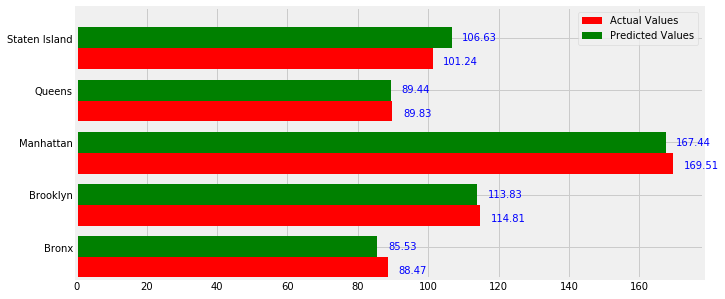

In [43]:
ind = np.arange(len(RF_visual))

fig, ax = plt.subplots()
width = 0.4

ax.barh(ind, RF_visual['Actual Values'], width, color='red', label='Actual Values')
ax.barh(ind + width, RF_visual['Predicted Values'], width, color='green', label='Predicted Values')

ax.set(yticks=ind + width, yticklabels=RF_visual['Neighbourhood Group Cleansed'], ylim=[2*width - 1, len(RF_visual)])
ax.legend()


for i, v in enumerate(RF_visual['Predicted Values'].round(2)):
    ax.text(v + 3, i + .35, str(v), color='blue')
for i, v in enumerate(RF_visual['Actual Values'].round(2)):
    ax.text(v + 3, i - .10, str(v), color='blue')

fig.set_size_inches(10, 5)

plt.show()

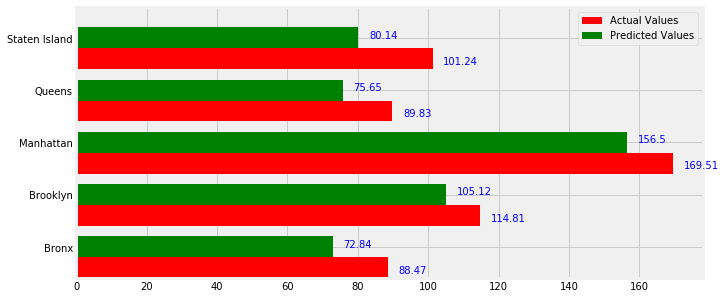

In [44]:
ind = np.arange(len(MLP_visual))
width = 0.4

fig, ax = plt.subplots()
ax.barh(ind, MLP_visual['Actual Values'], width, color='red', label='Actual Values')
ax.barh(ind + width, MLP_visual['Predicted Values'], width, color='green', label='Predicted Values')

ax.set(yticks=ind + width, yticklabels=MLP_visual['Neighbourhood Group Cleansed'], ylim=[2*width - 1, len(MLP_visual)])
ax.legend()


for i, v in enumerate(MLP_visual['Predicted Values'].round(2)):
    ax.text(v + 3, i + .40, str(v), color='blue')
for i, v in enumerate(MLP_visual['Actual Values'].round(2)):
    ax.text(v + 3, i - .10, str(v), color='blue')

fig.set_size_inches(10, 5)

plt.show()